**2**) 
* LDA: Parametric. 
$$\delta_k(x) = x\frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log(\pi_k)$$
* QDA: Parametric. 
$$\delta_k(x) = -\frac{1}{2}(x-\mu_k)^T\sum_{k}^{-1}(x-\mu_k)-\frac{1}{2}log{|{\sum_{k}}|} + log{\pi_k}$$

* Logistic: Parametric.  
$$ p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$$
* KNN: Non-parametric. 

KNN is the most flexible method of all these classification approaches. LDA and logistic regression are the most biased of the approaches. QDA is a  compromise between the flexibility of kNN and the bias that LDA and logistic regression have. LDA outperforms logistic regression when the observations come from a Gaussian distribution with a common covariance matrix in each class. However, logistic regression outperforms LDA if the observations do NOT come from a Gaussian distribution.

The KNN classifier finds k nearest neighbors of the data point in question by calculating the Eucledian distances between that data point and the rest of the data points in the set. The KNN classifier then finds the place between those k points where the probability of a point being in one group is about equal to that of that point being in the other group (i.e., a tie). This place becomes part of the decision boundary of the KNN classifer. The classifier performs these steps iteratively for all points in the data set in order to draw a decision boundary. Points that fall on one side of the decision boundary belongs to the group defined by that side of the boundary. KNN does not assume a function for this decision boundary. 


**4.10 **

**a)**

In [12]:
library(ISLR)
?Weekly

In [6]:
str(Weekly)
attach(Weekly)
summary(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


The following objects are masked from Weekly (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

There appears to be a strong correlation between the volume traded and the year that the shares were traded, but not with the return for the previous weeks. 

[1] 0.8419416

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


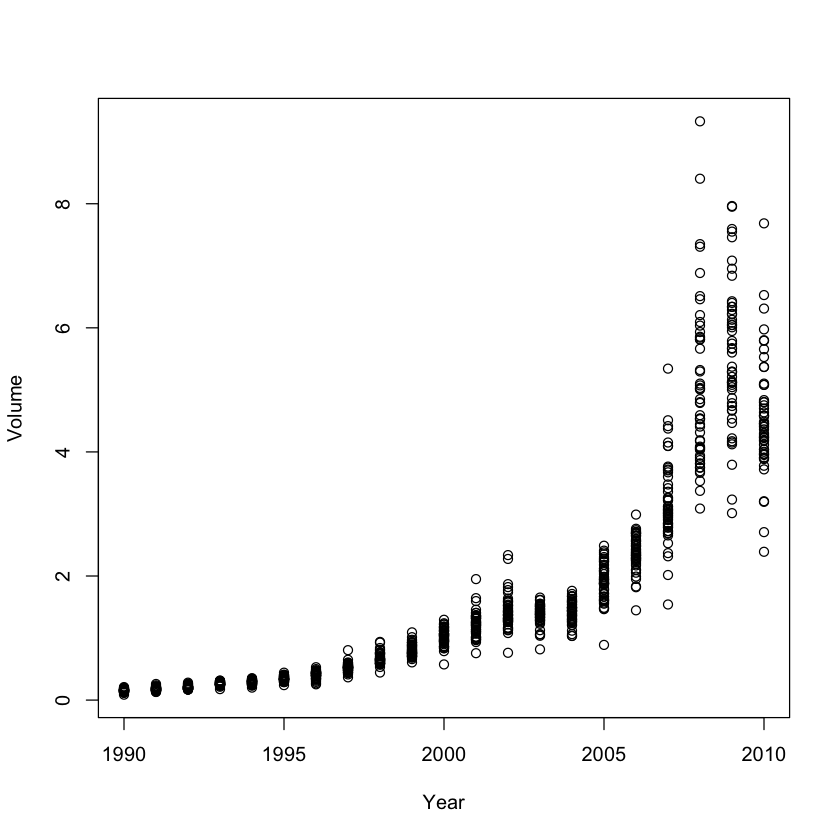

In [15]:
plot(Year,Volume)
cor(Volume, Year)
cor(Weekly[,c(1:8)])

**b)**  The Lag2 predictor was significantly different from zero. This means that it was helpful in predicting whether the market return went up or down. The intercept was also significantly different from zero, but is likely not informative because the volume traded will likely not be zero. 


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


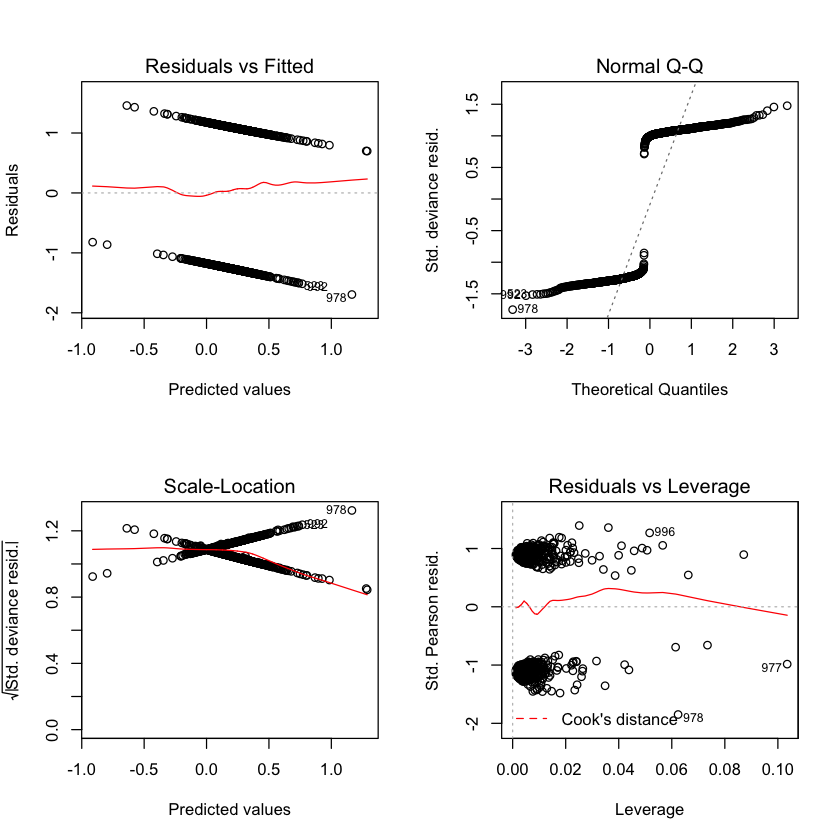

In [16]:
log.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, family=binomial)
op <- par(mfrow=c(2,2))
plot(log.fit)

summary(log.fit)

,Up
Down,0
Up,1


        Direction
log.pred Down  Up
    Down   54  48
    Up    430 557

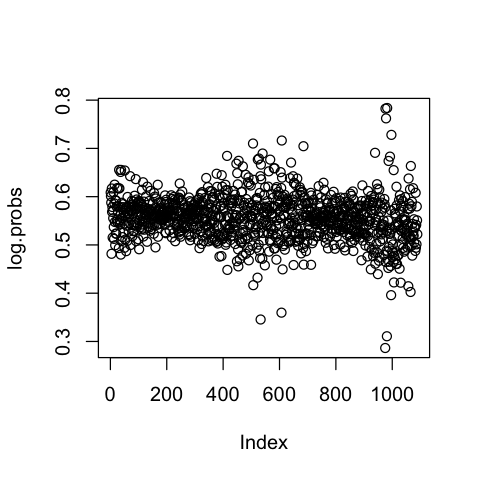

In [27]:
log.probs = predict(log.fit, type = "response")
# Let's visualize this
options(repr.plot.width=4, repr.plot.height=4)
plot(log.probs)
# confusionMatrix(log.fit)
contrasts(Direction)
# First make a list of "Downs"
log.pred=rep("Down",nrow(Weekly))
# Then use the glm.probs output to predict the up days. Let's use a threshold of 50% probability
log.pred[log.probs>.5]="Up"

In [28]:
#prediction accuracy
table(log.pred, Direction)

        Direction
log.pred Down  Up
    Down   54  48
    Up    430 557

The logistic classifier more frequently *misclassifies* the downward percentage return  than the upward return. This might be due to biases in the proportion of up versus down directions in the data set. 

**d)**


Call:
glm(formula = Direction ~ Lag2, family = binomial, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


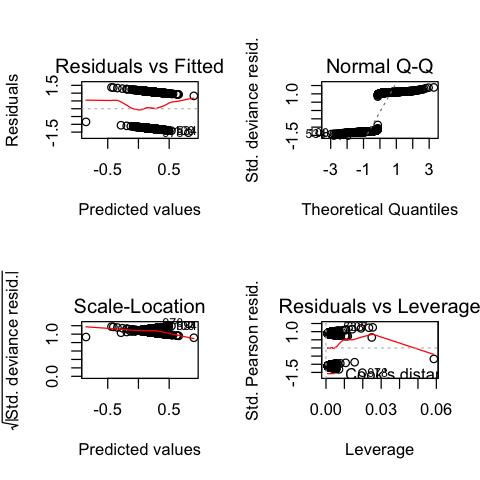

In [40]:
train = (Year<2009)
test = Weekly[!train,]

sparse_log.fit = glm(Direction~Lag2, subset=train, family=binomial)
op <- par(mfrow=c(2,2))
plot(sparse_log.fit)

summary(sparse_log.fit)

In [42]:
# Predict the 2005 performance from the model trained on the pre-2005 data
sparse_log.probs=predict(sparse_log.fit, test, type="response")
sparse_log.pred=rep("Down",nrow(test)) 
sparse_log.pred[sparse_log.probs>0.5]="Up"

# Show the confusion matrix
table(sparse_log.pred, test$Direction)

               
sparse_log.pred Down Up
           Down    9  5
           Up     34 56

In [44]:
mean(sparse_log.pred==test$Direction)

[1] 0.625

In [57]:
summary(Weekly[train,])

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1994   1st Qu.: -1.1540   1st Qu.: -1.1470   1st Qu.: -1.1540  
 Median :1999   Median :  0.2310   Median :  0.2340   Median :  0.2310  
 Mean   :1999   Mean   :  0.1245   Mean   :  0.1278   Mean   :  0.1229  
 3rd Qu.:2004   3rd Qu.:  1.3340   3rd Qu.:  1.3370   3rd Qu.:  1.3370  
 Max.   :2008   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5             Volume            Today         
 Min.   :-18.1950   Min.   :-18.195   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1540   1st Qu.: -1.154   1st Qu.:0.30734   1st Qu.: -1.1540  
 Median :  0.2300   Median :  0.230   Median :0.80485   Median :  0.2310  
 Mean   :  0.1222   Mean   :  0.121   Mean   :1.20597   Mean   :  0.1305  
 3rd Qu.:  1.3370   3rd Qu.:  1.337   3rd Qu.:1.51585   3rd Qu.:  1.3370  
 Max.   : 12.0260   Max.   : 12.026   M

In [49]:
str(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


In [51]:
contrasts(Direction)

,Up
Down,0
Up,1


**e**

Call:
lda(Direction ~ Lag2, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

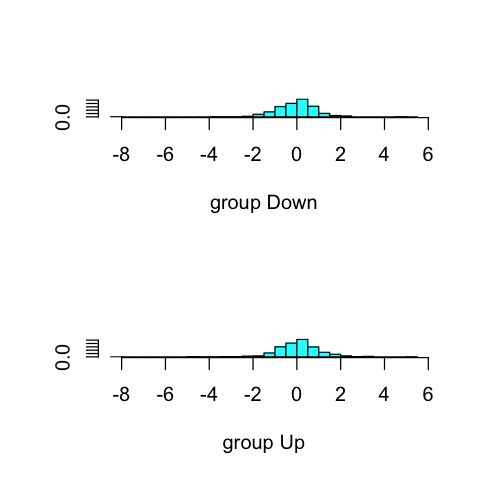

In [68]:
library(MASS)
lda.fit = lda(Direction~Lag2, subset=train)
lda.fit
plot(lda.fit)

In [62]:
#lda
lda.pred=predict(lda.fit, test, type="response")
lda.class = lda.pred$class 

table(lda.class, test$Direction)
mean(lda.class==test$Direction)

         
lda.class Down Up
     Down    9  5
     Up     34 56

[1] 0.625

In [75]:
#qda
(qda.fit = qda(Direction~Lag2, subset=train)
)
qda.pred=predict(qda.fit, test, type="response")
qda.class = qda.pred$class 

table(qda.class, test$Direction)
mean(qda.class==test$Direction)

Call:
qda(Direction ~ Lag2, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

         
qda.class Down Up
     Down    0  0
     Up     43 61

[1] 0.5865385

In [86]:
#knn
library(class)

train.X = data.frame(cbind(Lag2)[train,])

test.X = data.frame(cbind(Lag2)[!train,])

# Now let's get the response variable 
train.Direction = Direction[train]

# Set the randomization seed
set.seed(1)

In [90]:
# Now let's look at closest neighbors
knn.pred=knn(train.X, test.X, train.Direction, k=1, prob=TRUE)
table(knn.pred,test$Direction)
# Get the accuracy from the table
sum(diag(table(knn.pred, test$Direction)))/nrow(test.X)

        
knn.pred Down Up
    Down   21 29
    Up     22 32

[1] 0.5096154

**h)** The linear discriminant analysis and the logistic regression have the best overall test classification performance of the classification methods we tried. However, they both come with severe biases -- because there's a greater proportion of positive "up" returns than negative "down" returns in the training data, the classification for down returns is poor and the classifiers are biased toward an "up" classification. 

**i)**

[1] 0.5865385

        
knn.pred Down Up
    Down   20 20
    Up     23 41

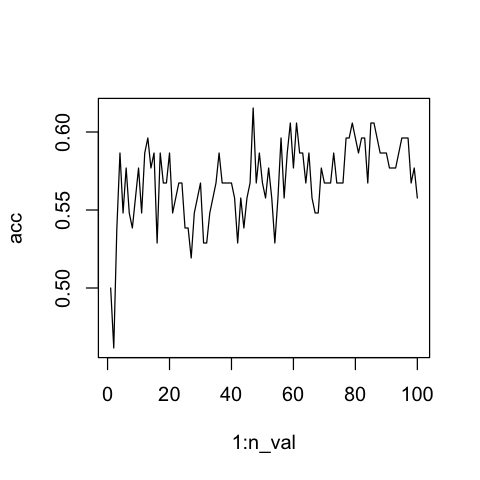

In [120]:
#experimenting with k 
n_val = 100
acc = numeric(length=n_val)
for (kval in 1:n_val) {
    knn.pred=knn(train.X, test.X, train.Direction, k=kval)
    acc[kval] = sum(diag(table(knn.pred, test$Direction)))/nrow(test.X)
}
knn.pred = knn(train.X, test.X, train.Direction, k=15)
acc[15]
table(knn.pred, test$Direction)
plot(x=1:n_val, y=acc, type='l')

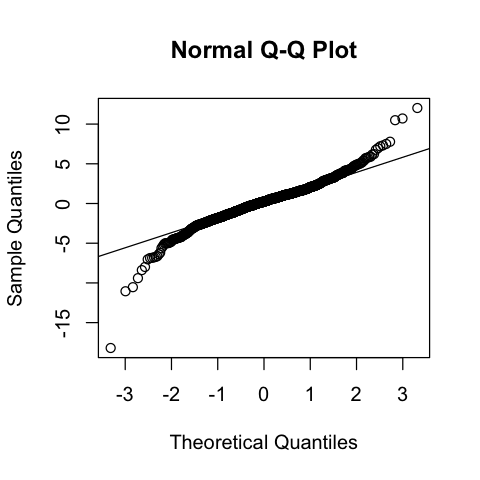

ERROR: Error in Log(Lag2 + constant): could not find function "Log"


ERROR: Error in Log(Lag2 + constant): could not find function "Log"


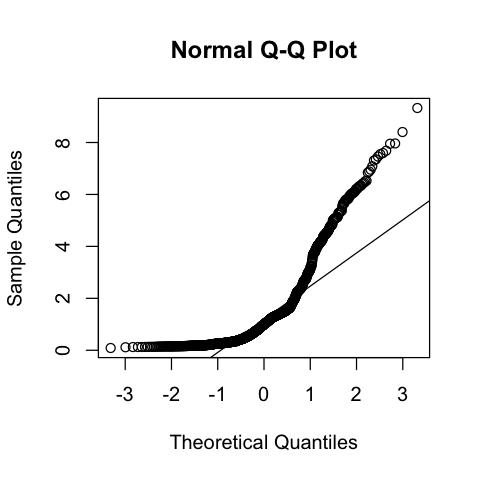

In [132]:
#lda 
lda.fit = lda(Direction~Log(Lag2+constant), subset=train)
lda.fit
plot(lda.fit)
lda.pred=predict(lda.fit, test, type="response")
lda.class = lda.pred$class 

table(lda.class, test$Direction)
mean(lda.class==test$Direction)

In [124]:
#qda 
qda.fit = qda(Direction~Lag1*Lag2*Lag3*Lag4*Lag5*Volume, subset=train)
qda.pred=predict(qda.fit, test, type="response")
qda.class = qda.pred$class 

table(qda.class, test$Direction)
mean(qda.class==test$Direction)

         
qda.class Down Up
     Down   15 34
     Up     28 27

[1] 0.4038462

In [139]:
#logistic 
log.fit2 = glm(Direction~Lag1+Volume, subset=train, family=binomial)
summary(log.fit2)
log.fit2 = glm(Direction~Lag1+Lag2+Volume, subset=train, family=binomial)
summary(log.fit2)
log.fit2 = glm(Direction~Lag1+Lag2+Lag3+Volume, subset=train, family=binomial)
summary(log.fit2)
log.fit2 = glm(Direction~Lag1+Lag2+Lag3+Lag4+Volume, subset=train, family=binomial)
summary(log.fit2)
log.fit2 = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, subset=train, family=binomial)
summary(log.fit2)

log.fit2 = glm(Direction~Lag2*Volume, subset=train, family=binomial)
summary(log.fit2)

test.probs = predict(log.fit2, Weekly.2009, type = "response")

test.pred=rep("Down",nrow(Weekly.2009))
test.pred[test.probs>.5]="Up"

table(test.pred, Direction.2009)

mean(test.pred==Direction.2009)


Call:
glm(formula = Direction ~ Lag1 + Volume, family = binomial, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.458  -1.258   1.012   1.086   1.314  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.32025    0.09019   3.551 0.000384 ***
Lag1        -0.06445    0.02903  -2.220 0.026425 *  
Volume      -0.08391    0.05175  -1.621 0.104948    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1347.8  on 982  degrees of freedom
AIC: 1353.8

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Volume, family = binomial, 
    subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4681  -1.2581   0.9929   1.0840   1.5339  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.29792    0.09136   3.261  0.00111 **
Lag1        -0.05975    0.02917  -2.048  0.04054 * 
Lag2         0.04774    0.02941   1.624  0.10446   
Volume      -0.07093    0.05263  -1.348  0.17777   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1345.1  on 981  degrees of freedom
AIC: 1353.1

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Volume, family = binomial, 
    subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4946  -1.2577   0.9906   1.0867   1.4964  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.30403    0.09226   3.295 0.000983 ***
Lag1        -0.05911    0.02921  -2.024 0.042997 *  
Lag2         0.04612    0.02956   1.560 0.118703    
Lag3        -0.01412    0.02906  -0.486 0.627026    
Volume      -0.07431    0.05312  -1.399 0.161870    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1344.9  on 980  degrees of freedom
AIC: 1354.9

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Volume, 
    family = binomial, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5132  -1.2535   0.9891   1.0873   1.4481  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.31580    0.09315   3.390 0.000699 ***
Lag1        -0.06097    0.02924  -2.085 0.037052 *  
Lag2         0.04710    0.02960   1.591 0.111559    
Lag3        -0.01701    0.02934  -0.580 0.562114    
Lag4        -0.02741    0.02910  -0.942 0.346261    
Volume      -0.08050    0.05351  -1.505 0.132449    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1344.0  on 979  degrees of freedom
AIC: 1356

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7186  -1.2498   0.9823   1.0841   1.4911  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.33258    0.09421   3.530 0.000415 ***
Lag1        -0.06231    0.02935  -2.123 0.033762 *  
Lag2         0.04468    0.02982   1.499 0.134002    
Lag3        -0.01546    0.02948  -0.524 0.599933    
Lag4        -0.03111    0.02924  -1.064 0.287241    
Lag5        -0.03775    0.02924  -1.291 0.196774    
Volume      -0.08972    0.05410  -1.658 0.097240 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1342.3  on 978  degrees of freedom
AIC: 1356.3

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag2 * Volume, family = binomial, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.438  -1.263   1.022   1.086   1.521  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.27007    0.09024   2.993  0.00277 **
Lag2         0.05036    0.03998   1.260  0.20781   
Volume      -0.05436    0.05279  -1.030  0.30317   
Lag2:Volume  0.00151    0.01328   0.114  0.90945   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1349.4  on 981  degrees of freedom
AIC: 1357.4

Number of Fisher Scoring iterations: 4


ERROR: Error in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == : object 'Weekly.2009' not found
